# Larger Dataset Regression Using Neural Networks in TensorFlow

## Import libraries and packages

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.18.0


## Read in the dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Define a column transformer that Feature scales and Normalizes the input numerical features while OneHotEncoding the input categorical features.

In [ ]:
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (MinMaxScaler(),["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"])
)

## Create $X$ and $y$ dataframes

In [ ]:
X = df.drop("charges",axis=1)
y = df["charges"]

## Create train and test datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Column-transform **fit** to the  `X_train` dataset, then column-transform **transform** `X_train` and `X_test`.

In [ ]:
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
print(X_train.loc[0],"\n\n", X_train_normal[0])

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object 

 [0.60869565 0.10734463 0.4        1.         0.         1.
 0.         0.         1.         0.         0.        ]


## Check input and output shapes

In [ ]:
input_shape = X_train_normal.shape
output_shape = y_train.shape
input_shape,output_shape

((1070, 11), (1070,))

## Steps in modeling with TensorFlow

#### Create a model using the Sequential API

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(10))
model_1.add(tf.keras.layers.Dense(1))

#### Compile the model

In [ ]:
model_1.compile(loss=tf.keras.losses.mae,                   # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(),        # SGD is short for stochastic gradient descent
              metrics=["mae"])

#### Fit the Model

**Note:** We do not have to convert `X_train_normal` and `y_train` to tensors because pandas is built upon numpy.  We know that TensorFlow handles numpy arrays quite easily.

In [ ]:
model_1.fit(X_train_normal, y_train, epochs=100, verbose=False)

#### Generate a summary of the model

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133 (536.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

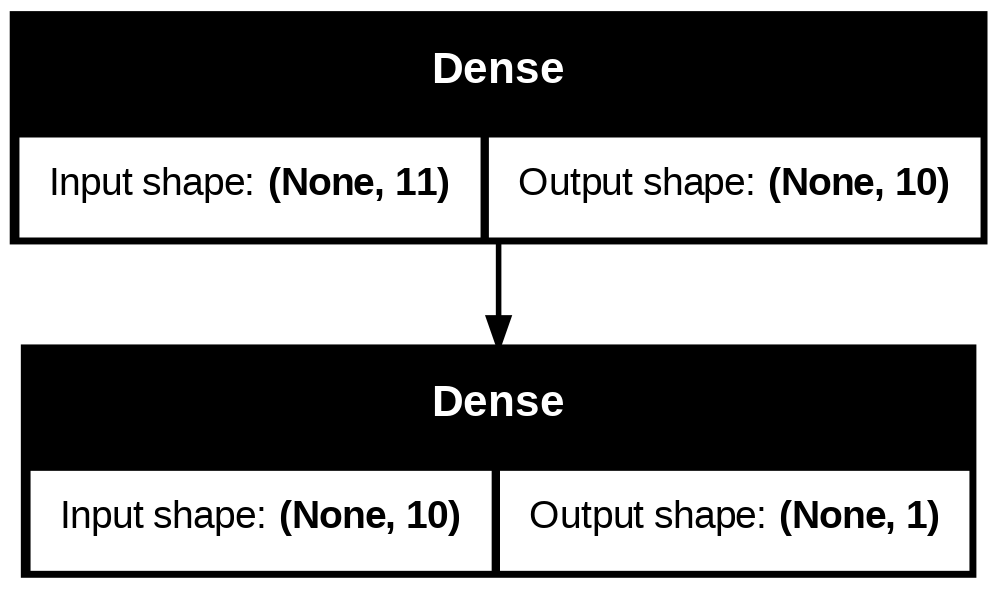

In [ ]:
plot_model(model_1, show_shapes=True)

#### Evaluate the model

In [ ]:
model_1.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3227.8210 - mae: 3227.8210  


[3164.158935546875, 3164.158935546875]

In [ ]:
y_test.median(), y_test.mean()

(8487.8803, 12968.317062869404)

#### The model is performing just okay.  It can be improved.



#### Let's add another hidden layer to the model.

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(100))
model_2.add(tf.keras.layers.Dense(10))
model_2.add(tf.keras.layers.Dense(1))

model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

history = model_2.fit(X_train_normal, y_train, epochs=100, verbose=False)
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)

In [ ]:
model_2.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3215.7307 - mae: 3215.7307  


[3163.05859375, 3163.05859375]

#### Plot history (loss curve or training curve)

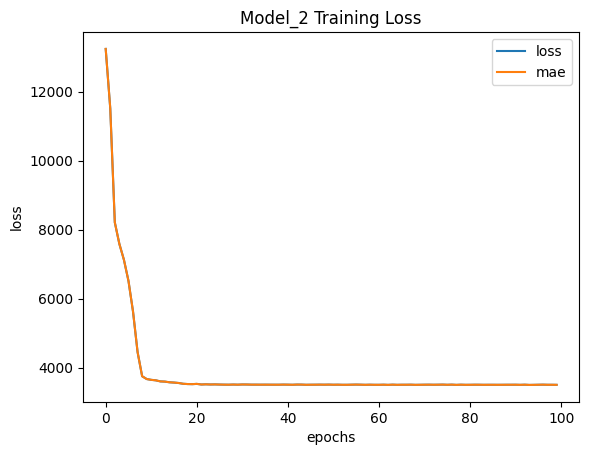

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Model_2 Training Loss")
plt.show()

#### Okay, for how many epochs should we train?  TensorFlow has a solution: the early-stopping Callback.

#### Let's add some activation functions to the hidden layers to improve performance.

In [ ]:
# Create a model using the Sequential API
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(100, activation="relu"))
model_3.add(tf.keras.layers.Dense(10, activation="relu"))
model_3.add(tf.keras.layers.Dense(1))


# Compile the model
model_3.compile(loss=tf.keras.losses.mae,                                      # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit the model
history = model_3.fit(X_train_normal, y_train, epochs=300, verbose=False)


In [ ]:
model_3.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1757.6495 - mae: 1757.6495  


[1746.411865234375, 1746.411865234375]

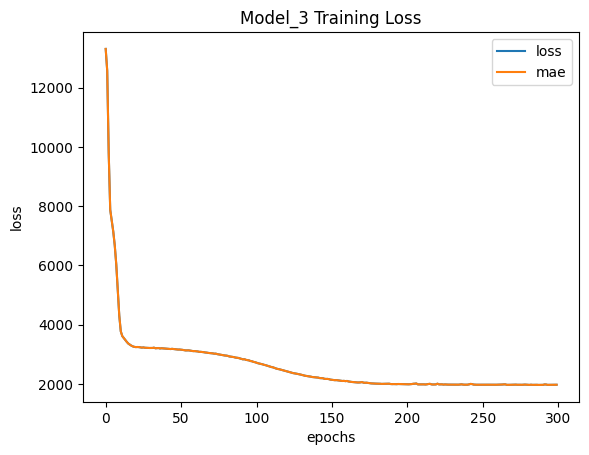

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Model_3 Training Loss")
plt.show()

## Common ways to improve a DNN model:

* Adding layers
* Increase the number of hidden units
* Change the activation function
* Change the optimization function
* Change the learning rate  (this usually has the most impact)


In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(, y_train, c='b', label='Training Data')
plt.scatter(X_test, y_test, c='g', label='Testing Data')
plt.scatter(X_test, preds, c='r', label='Predictions')
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-22-aa1cbc9e3832>, line 2)

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_test,y_test, c='g', label='Testing Data')
plt.scatter(X_test,preds, c='r', label='Predictions')
plt.grid(True)
plt.legend()
plt.show()

#### Model Evaluation Metrics

In [ ]:
model3.evaluate(X_test,y_test)

#### Mean Absolute Error

In [ ]:
y_test,preds

In [ ]:
# Need to convert preds to a tensor and reshape y_test

preds = tf.constant(preds)
y_test = tf.reshape(tf.cast(y_test,dtype=tf.float32), (preds.shape))
preds, y_test

In [ ]:
mae = tf.reduce_mean(tf.abs(y_test - preds))
mae

In [ ]:
mae=MeanAbsoluteError()
mae.update_state(y_test,preds)
mae.result().numpy()

#### Mean Squared Error

In [ ]:
mse=MeanSquaredError()
mse.update_state(y_test,preds)
mse.result().numpy()

#### Run experiments to improve model performance.

1. `model1` - same as original model, 1 layer, trained for 100 epochs.
2. `model2` - 2 layers trained for 100 epochs
3. `model3` - 2 layers trained for 500 epochs

In [ ]:
# model_1

tf.random.set_seed(42)

model1.summary()

In [ ]:
plot_model(model1, show_shapes=True)

In [ ]:
model1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100, verbose=False)

In [ ]:
model1.evaluate(tf.expand_dims(X_test,axis=-1), y_test)

In [ ]:
model1.predict(np.array([20.0]))

In [ ]:
preds = model1.predict(X_test)
preds

In [ ]:
def plot_model_results(X_train, y_train, X_test, y_test, preds):

  plt.figure(figsize=(10,7))
  plt.scatter(X_train, y_train, c='b', label='Training Data')
  plt.scatter(X_test, y_test, c='g', label='Testing Data')
  plt.scatter(X_test, preds, c='r', label='Predictions')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10,7))
  plt.scatter(X_test,y_test, c='g', label='Testing Data')
  plt.scatter(X_test,preds, c='r', label='Predictions')
  plt.grid(True)
  plt.legend()
  plt.show()
  return

In [ ]:
def model_experiment(model, X_train, y_train, X_test, y_test, epochs=100):
    tf.random.set_seed(42)
    model.summary()
    plot_model(model, show_shapes=True)
    model.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=epochs,verbose=False)
    print(model.evaluate(tf.expand_dims(X_test,axis=-1), y_test))
    preds = model.predict(X_test)
    preds = tf.constant(preds)
    y_test = tf.reshape(tf.cast(y_test,dtype=tf.float32), (preds.shape))
    plot_model_results(X_train, y_train, X_test, y_test, preds)
    mae = tf.reduce_mean(tf.abs(y_test - preds))
    mse = tf.reduce_mean(tf.square(y_test - preds))
    return mae, mse

In [ ]:
mae1,mse1 = model_experiment(model1, X_train, y_train, X_test, y_test, epochs=100)

In [ ]:
# model2
mae2,mse2 = model_experiment(model2, X_train, y_train, X_test, y_test, epochs=100)

In [ ]:
mae3,mse3 = model_experiment(model3, X_train, y_train, X_test, y_test, epochs=500)

#### Summarize modeling experiment results...

In [ ]:
model_results = [["model1", mae1.numpy(), mse1.numpy()],
                 ["model2", mae2.numpy(), mse2.numpy()],
                 ["model3", mae3.numpy(), mse3.numpy()]]

df = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
df

#### Save the best model, `model3`

In [ ]:
model3.save("model3_best_model.keras")

#### Load the model back into the environment.

In [ ]:
loaded_model = tf.keras.models.load_model("model3_best_model.keras")
loaded_model.summary()

In [ ]:
preds3 = model3.predict(X_test)

In [ ]:
preds3_loaded = loaded_model.predict(X_test)

In [ ]:
preds3.shape, preds3_loaded.shape, preds3==preds3_loaded

In [ ]:
df.head()